<a href="https://colab.research.google.com/github/Fedor102/Handwritten-letters/blob/main/handwritten_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя датасет по рукописным буквам английского языка с помощью библиотеки Keras, обучим модель, оценим ее предсказательные способности. Используем только полносвязанные слои. Нарисуем графики точности и потерь для обучающей и тестовой выборки, сделайте по ним выводы.

###Загрузка датасета с буквами английского алфавита

In [ ]:
import numpy as np
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [ ]:
X = dataset[:,1:785]
Y = dataset[:,0]

In [ ]:
#Разделяем наш датасет на тренировочную и тестовую выборку 80 на 20
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

<ipython-input-4-345c6d01b830>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  im = plt.subplot(5, 8, i+1)


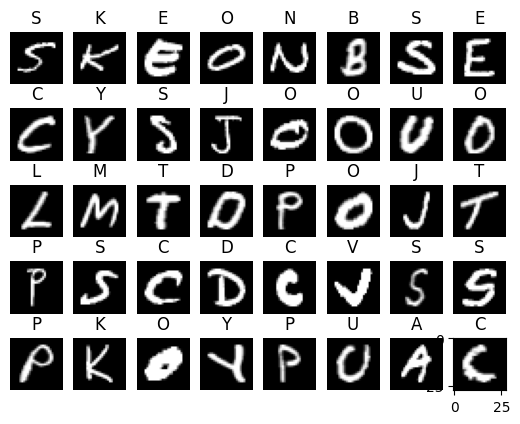

In [ ]:
#Создаём словарь и выводим помеченную картинку
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')


In [ ]:
x_train.shape

(297960, 784)

In [ ]:
len(y_train)

297960

In [ ]:
x_test.shape

(74491, 784)

In [ ]:
len(y_test)

74491

In [ ]:
y_test

array([18.,  4., 18., ..., 12., 11.,  1.])

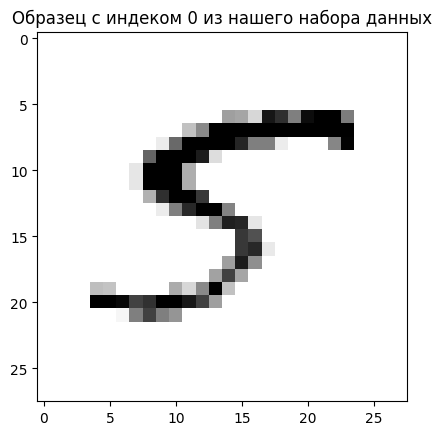

In [ ]:
#Посмотрим на первую картинку из датасета
import matplotlib.pyplot as plt
%matplotlib inline

digit = x_train[0]
digit = digit.reshape(28, 28)
fig, ax = plt.subplots(1,1)
ax.set_title('Образец с индеком 0 из нашего набора данных')
ax.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
#Строим нашу модель
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(26, activation='softmax'))

In [ ]:
#Компилируем модель
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
# изменение формы тензора
x_train = x_train.reshape((297960, 28 * 28))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
x_train = x_train.astype('float32') / 255

# изменение формы тензора
x_test = x_test.reshape((74491, 28 * 28))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
x_test = x_test.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 26) # Кодируем обучающие метки на 10 классов
y_test = to_categorical(y_test, 26)   # Кодируем тестовые метки на 10 классов

In [ ]:
#Обучаем модель
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
2328/2328 [==============================] - 31s 13ms/step - loss: 0.2564 - accuracy: 0.9300 - val_loss: 0.1257 - val_accuracy: 0.9663
Epoch 2/5
2328/2328 [==============================] - 27s 12ms/step - loss: 0.0994 - accuracy: 0.9725 - val_loss: 0.0941 - val_accuracy: 0.9746
Epoch 3/5
2328/2328 [==============================] - 27s 12ms/step - loss: 0.0709 - accuracy: 0.9803 - val_loss: 0.0804 - val_accuracy: 0.9784
Epoch 4/5
2328/2328 [==============================] - 28s 12ms/step - loss: 0.0551 - accuracy: 0.9845 - val_loss: 0.0778 - val_accuracy: 0.9793
Epoch 5/5
2328/2328 [==============================] - 29s 13ms/step - loss: 0.0443 - accuracy: 0.9875 - val_loss: 0.0664 - val_accuracy: 0.9825


In [ ]:
#Посмотрим на точность и ошибку на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точность на тестовом образцу:', test_acc)
print('Потери на тестовом образце:', test_loss)

2328/2328 [==============================] - 7s 3ms/step - loss: 0.0664 - accuracy: 0.9825
Точность на тестовом образцу: 0.9825482368469238
Потери на тестовом образце: 0.06641853600740433


In [ ]:
# Выбор нужной картинки из тестовой выборки
n = 35
x = x_test[n]

# Проверка формы данных
print(x.shape)

(784,)


In [ ]:
import numpy as np

# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


In [ ]:
# Предсказываем выбранную картинку
prediction = model.predict(x)

# Вывод результата - вектор из 26 букв
print(f'Вектор результата на 26 выходных нейронах: {prediction}')

# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана Буква: {word_dict[pred]}')
print(f'Правильное значение: {word_dict[np.argmax(y_test[n])]}')

1/1 [==============================] - 0s 40ms/step
Вектор результата на 26 выходных нейронах: [[2.44869251e-17 3.07523538e-13 1.26235173e-08 7.34382510e-08
  7.03683554e-07 3.94278429e-11 1.49170919e-16 1.00372553e-12
  4.96790054e-10 3.25552285e-15 6.95623385e-07 9.99997854e-01
  3.61874329e-15 1.40153320e-10 1.85669490e-17 6.45519362e-15
  1.71117967e-16 3.23145372e-10 1.58341747e-14 8.30817349e-13
  5.56273164e-07 5.55601615e-12 9.68801150e-11 1.10749084e-10
  8.10838105e-13 1.34592038e-09]]
Распознана Буква: L
Правильное значение: L


###Графики потерь и точности

<ipython-input-37-8a38e75c8123>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке', color='k')


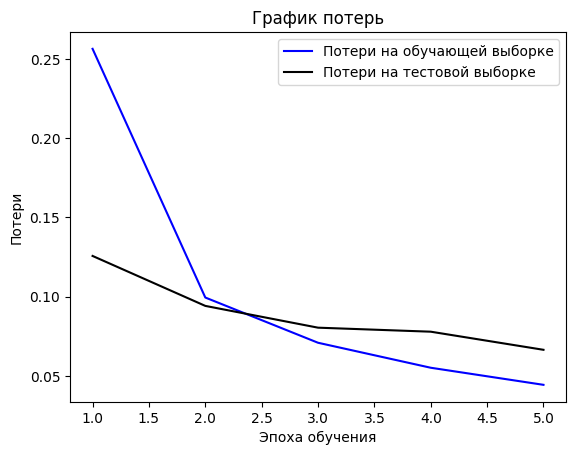

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке', color='k')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

<ipython-input-38-337a78bdc5fd>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке', color='k')


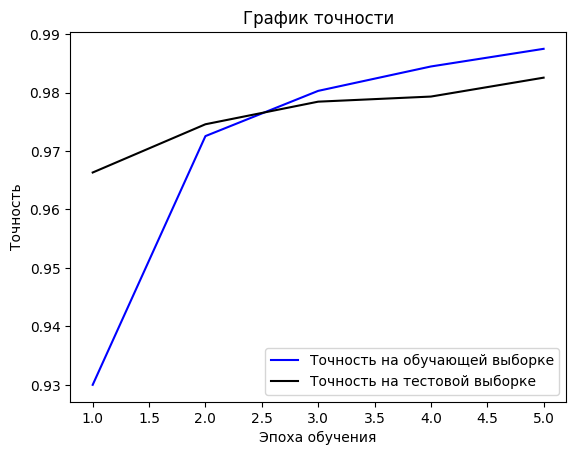

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'b', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке', color='k')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()